In [1]:
import math
import tensorflow as tf
import pandas as pd
import numpy as np
from glob import glob
from sklearn.datasets import load_sample_images

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data



plt.rcParams["figure.figsize"] = 15, 10

%matplotlib inline

/opt/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


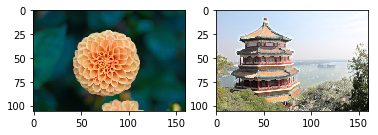

In [4]:
# Create a graph with input X plus a max pooling layer
X = tf.placeholder(tf.float32, shape=(None, height, width, channels))
max_pool = tf.nn.max_pool(X, ksize=[1,4,4,1], strides=[1,4,4,1],padding="VALID")

with tf.Session() as sess:
    output = sess.run(max_pool, feed_dict={X: dataset})

plt.subplot(1, 2, 1)
plt.imshow(output[0].astype(np.uint8))  # plot the output for the 1st image
plt.subplot(1, 2, 2)
plt.imshow(output[1].astype(np.uint8))  # plot the output for the 2nd image

Look that the size of the images have been reduced to half in each direction

In [5]:
base_path = "/data/MNIST"
df_train = pd.read_csv(base_path + "/mnist_train.csv", header = None)
df_test = pd.read_csv(base_path + "/mnist_test.csv", header = None)

X_data_train = df_train.iloc[:, 1:].values / 255 + 0.00001
X_data_test = df_test.iloc[:, 1:].values / 255 + 0.00001
y_data_train = df_train.iloc[:, 0].values 
y_data_test = df_test.iloc[:, 0].values

X_data_train.shape, X_data_test.shape

((60000, 784), (10000, 784))

In [6]:
tf.reset_default_graph()

with tf.Session() as sess:
    y = tf.placeholder(dtype=tf.int32, shape = [None], name="y")
    d = sess.run(tf.one_hot(y, depth=10), feed_dict={y: y_data_train})
df = pd.DataFrame(d)
df["y"] = y_data_train
df.head()

,0,1,2,3,4,5,6,7,8,9,y
0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,5
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,9


In [7]:
class Batchable:
    import math
    import numpy as np
    
    def shuffle(self):
        X = self.X
        y = self.y
        idx = np.arange(X.shape[0])
        np.random.shuffle(idx)
        self.X = X[idx, :]
        self.y = y[idx]
        return
    
    def __init__(self, X, y, batch_size = 128, seed = 1):
        np.random.seed(seed)
        self.X = X
        self.y = y
        self.shuffle()
        self.start = 0
        self.batch_size = batch_size
        self.num_batches = math.ceil(X.shape[0] / batch_size)
    
    def next(self):
        start = self.start
        end = self.start + self.batch_size
        end = min(self.X.shape[0], end)
        self.start = end % self.X.shape[0]
        return self.X[start: end, :], self.y[start: end]
    
def show(scores, ax = None):
    df = pd.DataFrame.from_dict(scores)
    if ax is None:
        _, ax = plt.subplots()
    df.plot.line(alpha = 0.4, ax = ax)
    df.rolling(100, min_periods=1).mean().plot.line(ax = ax) 

Instructions for updating:

Future major versions of TensorFlow will allow gradients to flow
into the labels input on backprop by default.

See tf.nn.softmax_cross_entropy_with_logits_v2.

{'iteration': 0, 'training': 0.1256, 'testing:': 0.1228}
{'iteration': 500, 'training': 0.7528833, 'testing:': 0.7595}
{'iteration': 1000, 'training': 0.81188333, 'testing:': 0.8151}
{'iteration': 1500, 'training': 0.8355167, 'testing:': 0.8398}
{'iteration': 2000, 'training': 0.84851664, 'testing:': 0.8519}
{'iteration': 2500, 'training': 0.85858333, 'testing:': 0.8608}
{'iteration': 3000, 'training': 0.8648833, 'testing:': 0.8657}
{'iteration': 3500, 'training': 0.86948335, 'testing:': 0.8697}
{'iteration': 4000, 'training': 0.8735333, 'testing:': 0.8747}
{'iteration': 4500, 'training': 0.8764833, 'testing:': 0.8769}
{'iteration': 5000, 'training': 0.8793333, 'testing:': 0.8798}
{'iteration': 5500, 'training': 0.88191664, 'testing:': 0.8829}
{'iteration': 6000, 'training': 0.88411665, 'testing:': 0

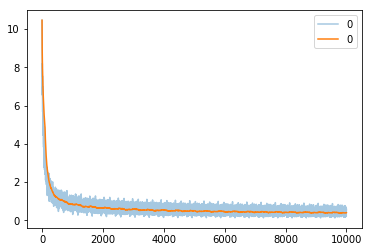

In [8]:
tf.reset_default_graph()

iterations = 10000
mini_batch_size = 128
n_y = 10
n_x = 784
n_h = 300


X = tf.placeholder(tf.float32, [None, n_x])
y = tf.placeholder(tf.int32, [None])

y_oh = tf.one_hot(y, depth = n_y)

W = tf.Variable(tf.truncated_normal(shape=[n_x, n_y], seed=1))
b = tf.zeros(shape=[n_y])

y_pred = tf.matmul(X, W) + b

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels= y_oh))

gd_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
#gd_step = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.cast(y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

scores =[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batchable = Batchable(X_data_train, y_data_train, mini_batch_size)
    for i in range(iterations):
        batch_x, batch_y = batchable.next()
        _, cost_ = sess.run([gd_step, cost], feed_dict={X: batch_x, y: batch_y})
        scores.append(cost_)
        if i % 500 == 0 or i == iterations - 1:
            accuracy_train = sess.run(accuracy, feed_dict={X: X_data_train, y: y_data_train})
            accuracy_test = sess.run(accuracy, feed_dict={X: X_data_test, y: y_data_test})
            d = {"iteration": i,"training": accuracy_train, "testing:":  accuracy_test}
            print(d)
            
show(scores)

{'iteration': 0, 'training': 0.09221666, 'testing:': 0.0973}
{'iteration': 500, 'training': 0.85761666, 'testing:': 0.8586}
{'iteration': 1000, 'training': 0.90195, 'testing:': 0.8968}
{'iteration': 1500, 'training': 0.9223167, 'testing:': 0.9101}
{'iteration': 2000, 'training': 0.93411666, 'testing:': 0.9219}
{'iteration': 2500, 'training': 0.9426, 'testing:': 0.9264}
{'iteration': 3000, 'training': 0.94876665, 'testing:': 0.9295}
{'iteration': 3500, 'training': 0.95711666, 'testing:': 0.9349}
{'iteration': 4000, 'training': 0.9629, 'testing:': 0.9368}
{'iteration': 4500, 'training': 0.9627, 'testing:': 0.9369}
{'iteration': 5000, 'training': 0.96595, 'testing:': 0.9391}
{'iteration': 5500, 'training': 0.9735, 'testing:': 0.9424}
{'iteration': 6000, 'training': 0.97635, 'testing:': 0.9433}
{'iteration': 6500, 'training': 0.97966665, 'testing:': 0.9433}
{'iteration': 7000, 'training': 0.9815, 'testing:': 0.9453}
{'iteration': 7500, 'training': 0.97796667, 'testing:': 0.9449}
{'iteratio

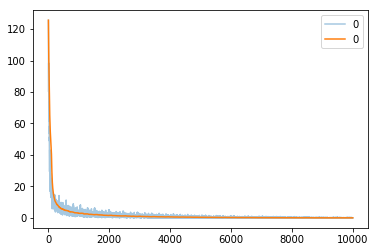

In [9]:
tf.reset_default_graph()

iterations = 10000
mini_batch_size = 128
n_y = 10
n_x = 784
n_h = 300


X = tf.placeholder(tf.float32, [None, n_x])
y = tf.placeholder(tf.int32, [None])

W1 = tf.Variable(tf.truncated_normal(shape=[n_x, n_h], seed=1))
b1 = tf.zeros(shape=[n_h])

y_oh = tf.one_hot(y, depth = n_y)

A1 = tf.nn.relu(tf.matmul(X, W1) + b1)

W2 = tf.Variable(tf.truncated_normal(shape=[n_h, n_y], seed=1))
b2 = tf.zeros(shape=[n_y])

y_pred = tf.matmul(A1, W2) + b2

cost = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_pred, labels= y_oh))

#gd_step = tf.train.GradientDescentOptimizer(0.1).minimize(cost)
gd_step = tf.train.AdamOptimizer(learning_rate=1e-3).minimize(cost)

correct_mask = tf.equal(tf.argmax(y_pred, 1), tf.cast(y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(correct_mask, tf.float32))

scores =[]

with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    batchable = Batchable(X_data_train, y_data_train, mini_batch_size)
    for i in range(iterations):
        batch_x, batch_y = batchable.next()
        _, cost_ = sess.run([gd_step, cost], feed_dict={X: batch_x, y: batch_y})
        scores.append(cost_)
        if i % 500 == 0 or i == iterations - 1:
            accuracy_train = sess.run(accuracy, feed_dict={X: X_data_train, y: y_data_train})
            accuracy_test = sess.run(accuracy, feed_dict={X: X_data_test, y: y_data_test})
            d = {"iteration": i,"training": accuracy_train, "testing:":  accuracy_test}
            print(d)
            
show(scores)

{'iteration': 0, 'train accuracy': 0.0625, 'test accuracy': 0.0738}
{'iteration': 10, 'train accuracy': 0.140625, 'test accuracy': 0.2317}
{'iteration': 20, 'train accuracy': 0.265625, 'test accuracy': 0.4541}
{'iteration': 30, 'train accuracy': 0.4609375, 'test accuracy': 0.6732}
{'iteration': 40, 'train accuracy': 0.6015625, 'test accuracy': 0.7735}
{'iteration': 50, 'train accuracy': 0.5625, 'test accuracy': 0.8105}
{'iteration': 60, 'train accuracy': 0.6875, 'test accuracy': 0.8437}
{'iteration': 70, 'train accuracy': 0.75, 'test accuracy': 0.8638}
{'iteration': 80, 'train accuracy': 0.6875, 'test accuracy': 0.8776}
{'iteration': 90, 'train accuracy': 0.7578125, 'test accuracy': 0.8816}
{'iteration': 100, 'train accuracy': 0.8125, 'test accuracy': 0.8906}
{'iteration': 110, 'train accuracy': 0.796875, 'test accuracy': 0.9017}
{'iteration': 120, 'train accuracy': 0.8671875, 'test accuracy': 0.9078}
{'iteration': 130, 'train accuracy': 0.8359375, 'test accuracy': 0.9152}
{'iteration'

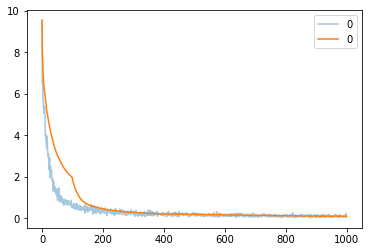

In [10]:
tf.reset_default_graph()

n_x, n_y = 784, 10
iterations = 1000

def weight_variable(shape):
    initial = tf.truncated_normal(shape, stddev=0.1)
    return tf.Variable(initial)


def bias_variable(shape):
    initial = tf.constant(0.1, shape=shape)
    return tf.Variable(initial)


def conv2d(x, W):
    return tf.nn.conv2d(x, W, strides=[1, 1, 1, 1], padding='SAME')


def max_pool_2x2(x):
    return tf.nn.max_pool(x, ksize=[1, 2, 2, 1],
                          strides=[1, 2, 2, 1], padding='SAME')


def conv_layer(input, shape):
    W = weight_variable(shape)
    b = bias_variable([shape[3]])
    return tf.nn.relu(conv2d(input, W) + b)


def full_layer(input, size):
    in_size = int(input.get_shape()[1])
    W = weight_variable([in_size, size])
    b = bias_variable([size])
    return tf.matmul(input, W) + b


X = tf.placeholder(tf.float32, shape=[None, n_x], name = "X")
y = tf.placeholder(tf.int32, shape=[None], name = "y")
y_oh = tf.one_hot(y, depth = n_y)

x_image = tf.reshape(X, [-1, 28, 28, 1])
conv1 = conv_layer(x_image, shape=[5, 5, 1, 32])
conv1_pool = max_pool_2x2(conv1)

conv2 = conv_layer(conv1_pool, shape=[5, 5, 32, 64])
conv2_pool = max_pool_2x2(conv2)

conv2_flat = tf.reshape(conv2_pool, [-1, 7*7*64])
full_1 = tf.nn.relu(full_layer(conv2_flat, 1024))

keep_prob = tf.placeholder(tf.float32, name="keep_prob")
full1_drop = tf.nn.dropout(full_1, keep_prob=keep_prob)

y_conv = full_layer(full1_drop, 10)

cross_entropy = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(logits=y_conv, labels= y_oh))
optimization = tf.train.AdamOptimizer(1e-4).minimize(cross_entropy)

correct_prediction = tf.equal(tf.argmax(y_conv, 1), tf.cast(y, tf.int64))
accuracy = tf.reduce_mean(tf.cast(correct_prediction, tf.float32))

accuracy = accuracy

batchable = Batchable(X_data_train, y_data_train)
scores = []
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for i in range(iterations):
        batch_x, batch_y = batchable.next()
        _, train_accuracy, cost = sess.run([optimization, accuracy, cross_entropy], 
                                         feed_dict={X: batch_x, y: batch_y, keep_prob: 0.8})
        scores.append(cost)
        if i % 10 == 0 or i == iterations - 1:
            test_accuracy = sess.run(accuracy, feed_dict={X: X_data_test, y: y_data_test, keep_prob: 1.0})
            print({"iteration": i, "train accuracy": train_accuracy, "test accuracy": test_accuracy})
                
show(scores)    

